In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 727kB 9.1MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 194kB 13.8MB/s 
     |████████████████████████████████| 1.2MB 25.8MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
Mounted at /content/gdrive


# Loading Data

In [ ]:
path = Path("./gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData")
p_heart = path/"Heart"

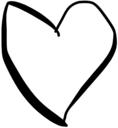

In [ ]:
img = Image.open(p_heart.ls()[0])
img.to_thumb(128, 128)

In [ ]:
# Get all the image paths
fns = get_image_files(path); fns

(#47) [Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_E17B1B1E-F05F-48AE-8156-588BA4296145.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_C591CA20-BD9A-4E7A-84A2-51215CCEE8E3.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_5954DB92-13C3-47DC-BCC6-3B03049E63AD.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_3C64A1B3-7B02-41D1-BE5C-E086DCED5206.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_0D5681F4-D26E-41B1-9914-3F2D31891164.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_6230F09F-5AF6-4CE1-A083-8E6D95F831DB.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_94EEB982-A3A5-429F-ABB5-738C02966C00.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/?/?_0384EED8-8A17-4916-A7D1-B8D277EE90EA.jpeg'),Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/Heart/Heart_20AC66EB-F90D-46F3-9A46-8C97D9A3CA8F.jp

In [ ]:
# Verify images
failed = verify_images(fns); failed

(#0) []

In [ ]:
gesture_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Specify the type of dependent and independent data
    get_items=get_image_files, #
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(340, min_scale=0.99)
)

In [ ]:
dls = gesture_db.dataloaders(path, bs=10)

In [ ]:
dls.vocab

['?', 'Circle', 'Heart', 'Smile', 'X']

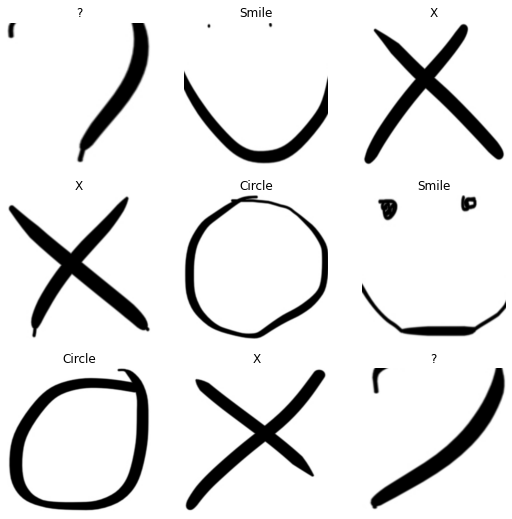

In [ ]:
dls.train.show_batch()

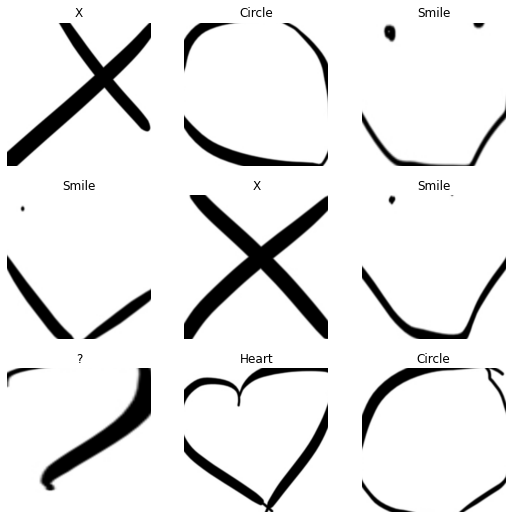

In [ ]:
dls.valid.show_batch()

In [ ]:
(0): AdaptiveConcatPool2d(
      (ap): AdaptiveAvgPool2d(output_size=1)
      (mp): AdaptiveMaxPool2d(output_size=1)
    )
    (1): Flatten(full=False)
    (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=1024, out_features=512, bias=False)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=512, out_features=5, bias=False)

In [ ]:
AdaptiveConcatPool2d??

In [ ]:
final_layer = nn.Sequential( AdaptiveConcatPool2d(1),
                            Flatten(full=False), 
                            # nn.BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                            nn.Dropout(p=0.25, inplace=False),
                            nn.Linear(in_features=1024, out_features=512, bias=False), 
                            nn.ReLU(inplace=True), 
                            # nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                            nn.Dropout(p=0.5, inplace=False), 
                            nn.Linear(in_features=512, out_features=5, bias=True))

learn = cnn_learner(dls, resnet18, metrics=error_rate, custom_head=final_layer)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,14.022689,13.459583,0.888889,00:00


epoch,train_loss,valid_loss,error_rate,time
0,9.164529,8.242456,0.666667,00:00
1,8.261275,3.734259,0.888889,00:00
2,7.555842,2.966666,0.555556,00:00
3,6.411895,8.894490,0.888889,00:00
4,5.090034,16.055346,0.888889,00:00
5,4.920511,9.230680,0.555556,00:00
6,4.153413,3.157655,0.555556,00:00
7,3.756912,0.294405,0.111111,00:00
8,3.342584,0.149398,0.111111,00:00
9,2.978901,0.160738,0.000000,00:00


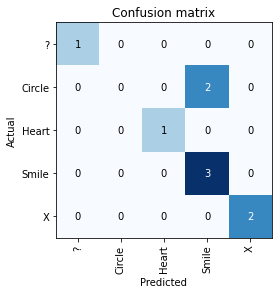

In [ ]:
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix()

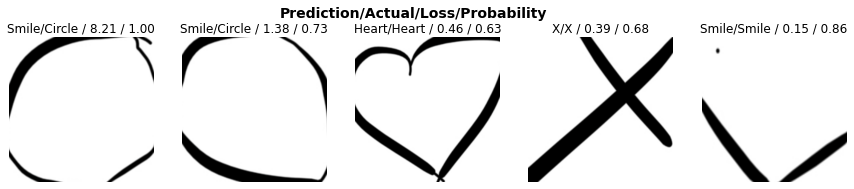

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
Flatten??

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.predict(p_heart.ls()[0])

('Heart',
 tensor(2),
 tensor([1.8470e-01, 1.6478e-02, 4.1804e-01, 3.8040e-01, 3.8715e-04]))

In [ ]:
p_heart.ls()[0]

Path('gdrive/MyDrive/Colab Notebooks/FastAI/data/TrainingData/Heart/Heart_20AC66EB-F90D-46F3-9A46-8C97D9A3CA8F.jpeg')

In [ ]:
learn.export()

In [ ]:
x = torch.randn(1, 3, 340, 340, requires_grad=False).cuda()
torch_out = torch.onnx._export(learn.model, x, "/content/gdrive/MyDrive/Colab Notebooks/FastAI/W1/models/gesture-resnet18.onnx", export_params=True)

In [ ]:
!pip install coremltools==3.0
!pip install onnx-coreml==1.0

     |████████████████████████████████| 3.4MB 9.1MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 7.1MB 7.1MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26310 sha256=82e21416d3fd1768e11128cafb162eb1863b4f5da7d40d0138482a5941836ec0
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing


In [ ]:
dls.c
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [ ]:
red_scale = 1.0 / (0.229 * 255.0)
green_scale = 1.0 / (0.224 * 255.0)
blue_scale = 1.0 / (0.225 * 255.0)

args = dict(is_bgr=False, red_bias = -(0.485 * 255.0)  , green_bias = -(0.456 * 255.0)  , blue_bias = -(0.406 * 255.0))

In [ ]:
import copy
import coremltools
import os

from onnx_coreml import convert
from onnx import onnx_pb

In [ ]:
coreml_model = convert(
    model="/content/gdrive/MyDrive/Colab Notebooks/FastAI/W1/models/gesture-resnet18.onnx",
    mode='classifier',
    target_ios='13', # to use Core ML 3
    image_input_names=['input.1'], # visualized using netron https://github.com/lutzroeder/Netron
    class_labels=[i for i in range(dls.c)],
    preprocessing_args=args,
)

1/57: Converting Node Type Conv
2/57: Converting Node Type Relu
3/57: Converting Node Type MaxPool
4/57: Converting Node Type Conv
5/57: Converting Node Type Relu
6/57: Converting Node Type Conv
7/57: Converting Node Type Add
8/57: Converting Node Type Relu
9/57: Converting Node Type Conv
10/57: Converting Node Type Relu
11/57: Converting Node Type Conv
12/57: Converting Node Type Add
13/57: Converting Node Type Relu
14/57: Converting Node Type Conv
15/57: Converting Node Type Relu
16/57: Converting Node Type Conv
17/57: Converting Node Type Conv
18/57: Converting Node Type Add
19/57: Converting Node Type Relu
20/57: Converting Node Type Conv
21/57: Converting Node Type Relu
22/57: Converting Node Type Conv
23/57: Converting Node Type Add
24/57: Converting Node Type Relu
25/57: Converting Node Type Conv
26/57: Converting Node Type Relu
27/57: Converting Node Type Conv
28/57: Converting Node Type Conv
29/57: Converting Node Type Add
30/57: Converting Node Type Relu
31/57: Converting Nod

In [ ]:
spec = coreml_model.get_spec()
nn_spec = spec.neuralNetworkClassifier
layers = nn_spec.layers # this is a list of all the layers
layers_copy = copy.deepcopy(layers) # make a copy of the layers, these will be added back later
del nn_spec.layers[:] # delete all the layers

In [ ]:
# add a scale layer now
# since mlmodel is in protobuf format, we can add proto messages directly
# To look at more examples on how to add other layers: see "builder.py" file in coremltools repo
scale_layer = nn_spec.layers.add()
scale_layer.name = 'scale_layer'
scale_layer.input.append('input.1')
scale_layer.output.append('input1_scaled')
params = scale_layer.scale
params.scale.floatValue.extend([red_scale, green_scale, blue_scale]) # scale values for RGB
params.shapeScale.extend([3,1,1]) # shape of the scale vector 

# now add back the rest of the layers (which happens to be just one in this case: the crop layer)
nn_spec.layers.extend(layers_copy)

# need to also change the input of the crop layer to match the output of the scale layer
nn_spec.layers[1].input[0] = 'input1_scaled'

In [ ]:
coreml_model = coremltools.models.MLModel(spec)

In [ ]:
coreml_path = '/content/gdrive/MyDrive/Colab Notebooks/FastAI/W1/models/GestureRecognizerModel.mlmodel'
coreml_model.save(coreml_path)